# Linear Regression


Eval their impact on the model.
    
Functions

OLS from previous study?

Gradient descent

## Table of Content
1. [Introduction](#introduction)
2. [Importing Libraries](#libraries)
3. [Load Dataset](#dataset)
4. [Prepare Data](#prep)
5. [Finding $b_1$](#b1)
6. [Finding $b_0$](#b0)
7. [Predicting](#pred)

## Introduction<a id="introduction"></a>
The purpose of this study is to learn about simple and multiple linear regression using both traditional methods and sklearn library. It assumes that there is a linear relation between the inputs $(x)$ and output $(y)$ as shown in the below formula.

$$\hat{y}= b_0 + b_1×x_1$$

First we'll calculate the weights using simple linear regression, then we'll do the same calculation using OLS and Gradient Descent. We'll use $RMSE$, $R^2$, $MAE$ and $MSE$ metrics to evaluate the performance of the proposed linear models.

## Import Libraries<a id="librariries"></a>

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
import seaborn as sb
import math as m

## Load Dataset<a id='dataset'></a>

We'll be using data from the TV Marketing study on [Kaggle](https://www.kaggle.com/datasets/devzohaib/tvmarketingcsv).

In [2]:
df = pd.read_csv('Data/tvmarketing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


## Prepare Data<a id='prep'></a>
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear.
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy.
- **Remove Collinearity.** Linear regression will overfit your data when you have highly correlated input variables.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution.
- **Rescale Inputs.** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

<AxesSubplot: xlabel='TV', ylabel='Sales'>

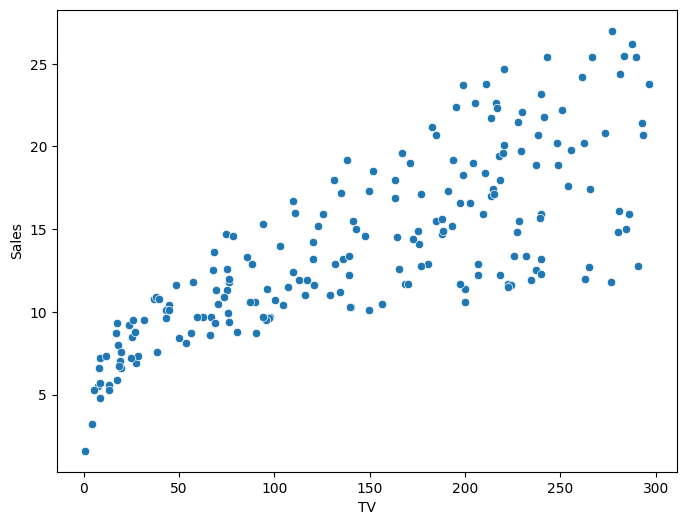

In [42]:
sb.scatterplot(data=df, x='TV', y='Sales')

We'll assume that the relation between the feature $(x)$ and the output $(y)$ is linear by looking at the above graph.

### Train-Test Split

We'll split the data and will fit all scaling and transformation processes on thi training dataset not to cause any data leakage.

In [46]:
x = df['TV']
y = df['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Training DataFrame
df_train = pd.DataFrame(columns=['TV', 'Sales'])
df_train['TV'] = x_train.reset_index(drop=True)
df_train['Sales'] = y_train.reset_index(drop=True)

# Testing DataFrame
df_test = pd.DataFrame(columns=['TV', 'Sales'])
df_test['TV'] = x_test.reset_index(drop=True)
df_test['Sales'] = y_test.reset_index(drop=True)
df_train.head()

,TV,Sales
0,67.8,12.5
1,139.5,10.3
2,96.2,11.4
3,18.8,7.0
4,76.4,11.8


### Checking for Noise (Outliers)

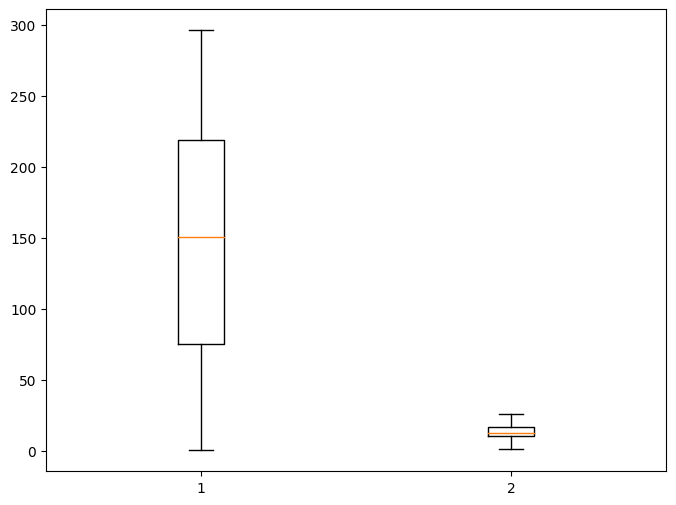

In [47]:
plt.boxplot(df_train[['TV', 'Sales']])
plt.show()

As it can be shown on the graph above, there are no outliers in the training dataset.

### Removing Colinearity
As we have only one input, this process is not applicable for this dataset.

### Gaussian Distribution

<AxesSubplot: xlabel='Sales', ylabel='Density'>

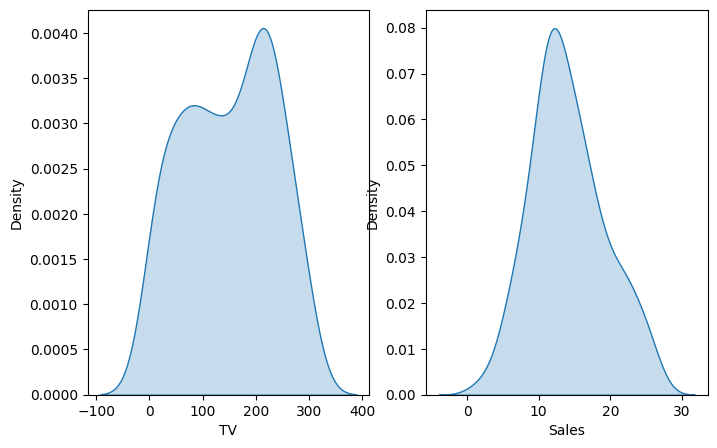

In [54]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sb.kdeplot(data=df_train['TV'], fill=True)
plt.subplot(1, 2, 2)
sb.kdeplot(data=df_train['Sales'], fill=True)

As it can be seen from the above graph, output has more gaussian distribution while the input is not in that shape. We should transform the input accordingly.

In [62]:
from sklearn.preprocessing import power_transform

df_train['TV_Transformed'] = power_transform(df_train['TV'].values.reshape(-1,1), 
                                             method='yeo-johnson', standardize=True)
df_train.head()

,TV,Sales,TV_Transformed
0,67.8,12.5,-0.904647
1,139.5,10.3,-0.031356
2,96.2,11.4,-0.541055
3,18.8,7.0,-1.642544
4,76.4,11.8,-0.791360


<AxesSubplot: xlabel='TV_Transformed', ylabel='Density'>

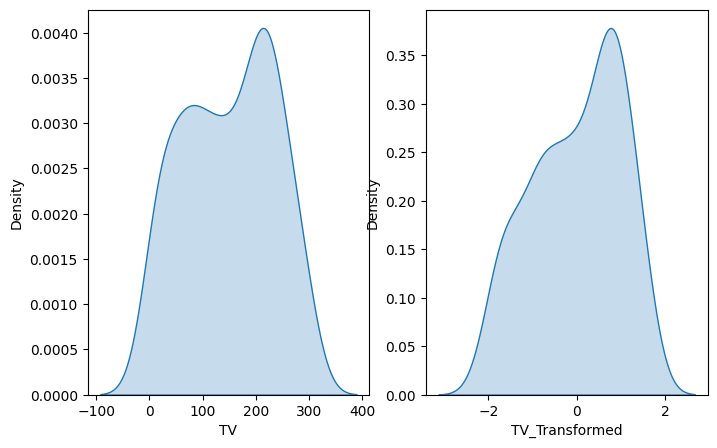

In [60]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sb.kdeplot(data=df_train['TV'], fill=True)
plt.subplot(1, 2, 2)
sb.kdeplot(data=df_train['TV_Transformed'], fill=True)

### Rescale Inputs

In [63]:
df_train.describe()

,TV,Sales,TV_Transformed
count,160.00000,160.000000,1.600000e+02
mean,149.43125,14.097500,1.276756e-16
std,85.38041,5.156811,1.003140e+00
min,0.70000,1.600000,-2.034587e+00
25%,75.45000,10.675000,-8.037236e-01
50%,150.65000,13.200000,9.349961e-02
75%,218.95000,17.325000,8.175508e-01
max,296.40000,26.200000,1.576891e+00


We don't need to rescale inputs as it's standardized during the transformation process.

## Finding the $b_1$<a id='b1'></a>

$$b_1 = \dfrac{\sum\limits_{i=1}^{n} ((x_i - mean(x) × (y_i - mean(y))}{\sum\limits_{i=1}^{n} (x_i - mean(x))^2}$$

In [64]:
mean_x = df_train['TV_Transformed'].mean()
mean_x

1.27675647831893e-16

In [65]:
mean_y = y_train.mean()
mean_y

14.097500000000002

In [66]:
df_train['TV-mean_x'] = df_train['TV_Transformed'] - mean_x
df_train['Sales-mean_y'] = df_train['Sales'] - mean_y
df_train.head()

,TV,Sales,TV_Transformed,TV-mean_x,Sales-mean_y
0,67.8,12.5,-0.904647,-0.904647,-1.5975
1,139.5,10.3,-0.031356,-0.031356,-3.7975
2,96.2,11.4,-0.541055,-0.541055,-2.6975
3,18.8,7.0,-1.642544,-1.642544,-7.0975
4,76.4,11.8,-0.791360,-0.791360,-2.2975


In [67]:
df_train['Mult'] = df_train['TV-mean_x'] * df_train['Sales-mean_y']
df_train.head()

,TV,Sales,TV_Transformed,TV-mean_x,Sales-mean_y,Mult
0,67.8,12.5,-0.904647,-0.904647,-1.5975,1.445174
1,139.5,10.3,-0.031356,-0.031356,-3.7975,0.119073
2,96.2,11.4,-0.541055,-0.541055,-2.6975,1.459495
3,18.8,7.0,-1.642544,-1.642544,-7.0975,11.657958
4,76.4,11.8,-0.791360,-0.791360,-2.2975,1.818150


In [68]:
sum_mult = df_train['Mult'].sum()
sum_mult

643.2831249553327

In [69]:
df_train['Squared'] = df_train['TV-mean_x'].pow(2)
df_train.head()

,TV,Sales,TV_Transformed,TV-mean_x,Sales-mean_y,Mult,Squared
0,67.8,12.5,-0.904647,-0.904647,-1.5975,1.445174,0.818386
1,139.5,10.3,-0.031356,-0.031356,-3.7975,0.119073,0.000983
2,96.2,11.4,-0.541055,-0.541055,-2.6975,1.459495,0.292740
3,18.8,7.0,-1.642544,-1.642544,-7.0975,11.657958,2.697952
4,76.4,11.8,-0.791360,-0.791360,-2.2975,1.818150,0.626251


In [70]:
sum_sq = df_train['Squared'].sum()
sum_sq

160.00000000000003

In [84]:
b1 = sum_mult / sum_sq
print('b\N{SUBSCRIPT ONE}:', b1)

b₁: 4.020519530970828


## Finding $b_0$<a id='b0'></a>

$$b_0 = mean(y) − b_1 × mean(x)$$

In [86]:
b0 = mean_y - b1 * mean_x
print('b\N{SUBSCRIPT ZERO}:', b0)

b₀: 14.097500000000002


## Predicting<a id='pred'></a>

In [73]:
df_test['TV_Transformed'] = power_transform(df_test['TV'].values.reshape(-1,1), 
                                             method='yeo-johnson', standardize=True)
df_test['Pred'] = b0 + b1*df_test['TV_Transformed']
df_test.head()

,TV,Sales,Pred,TV_Transformed
0,74.7,14.7,4.779679,-0.590823
1,255.4,19.8,12.113078,1.233169
2,112.9,11.9,6.679681,-0.118247
3,109.8,16.7,6.536534,-0.153851
4,31.5,9.5,2.035306,-1.273415


### Calculating the Performance of Prediction

**Mean Absolute Error (MAE):** MAE is a measure of errors between paired observations such as predicted and actual values.
$$MAE = \frac{\sum_{i=1}^n|\hat{y_i} - y_i|}{n}$$


**Mean Squared Error (MSE):** MSE tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.
$$MSE = \frac{\sum_{i=1}^n(\hat{y_i} - y_i)^2}{n}$$

The smaller the MSE and MAE is the better.

**RMSE**
$$ RMSE = \sqrt{\frac{\sum\limits_{i=1}^{n} (\hat{y_i} - y_i)^2}{n}} $$

**$R^2$:** A widely user measure that descibes how powerful a regression is. It's a relative measure adn takes values ranging from 0 to 1 and R squared of 0 means your regression line explains non of the variability of the data. 1 means your model explains the entire variability of the data.
There are 3 terms need to be defined before looking into R-squared:
1. **Sum of Squares Total (SST):** Also known as Total Sum of Squares (TSS).It's the observed square differences between the observed dependent variable and it's mean. It's the dispertion of the observed variables around the mean. <ins>Measures the total variablity of the dataset.</ins>
$$\sum_{i=1}^n(y_i - \overline{y})^2$$
2. **Sum of Squares Regression (SSR)**: Also known as Explain Sum of Squares (ESS). It's the sum of differences between the predicted value and the mean of the dependent variable. It's a measure that describes how well your line fits the data. <ins>Measures the explained variabilty by your line.</ins>
$$\sum_{i=1}^n(\hat{y} - \overline{y})^2$$

SSE = SST => The regression model captures all the observed variability and it's perfect.

3. **Sum of Squares Error (SSE)**: Also known as Residual (remaining or unexplained) Sum of Squares (RSS). It's the difference between observed value and the predicted value. <ins>Measures the unexplained variability by regression.</ins> The lower error, the better explanatory power of the regression.

$$\sum_{i=1}^ne_i^2$$

$SST = SSR + SST$: The total variability of the dataset is eqaul to the variablity explained by the regression line, plus the unexplained variability known as error.

$$R^2 = \frac{SSR}{SST}$$

In [74]:
df_test['error'] = df_test['Pred'] - df_test['Sales']
df_test.head()

,TV,Sales,Pred,TV_Transformed,error
0,74.7,14.7,4.779679,-0.590823,-9.920321
1,255.4,19.8,12.113078,1.233169,-7.686922
2,112.9,11.9,6.679681,-0.118247,-5.220319
3,109.8,16.7,6.536534,-0.153851,-10.163466
4,31.5,9.5,2.035306,-1.273415,-7.464694


In [75]:
df_test['sq_error'] = df_test['error'].pow(2)
df_test.head()

,TV,Sales,Pred,TV_Transformed,error,sq_error
0,74.7,14.7,4.779679,-0.590823,-9.920321,98.412777
1,255.4,19.8,12.113078,1.233169,-7.686922,59.088777
2,112.9,11.9,6.679681,-0.118247,-5.220319,27.251731
3,109.8,16.7,6.536534,-0.153851,-10.163466,103.296049
4,31.5,9.5,2.035306,-1.273415,-7.464694,55.721653


In [91]:
mae = df_test['error'].abs().sum() / len(df_test)
mse = df_test['sq_error'].sum() / len(df_test)
rmse = m.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 6.585291060183641
MSE: 53.789322210256806
RMSE: 7.334120411491538


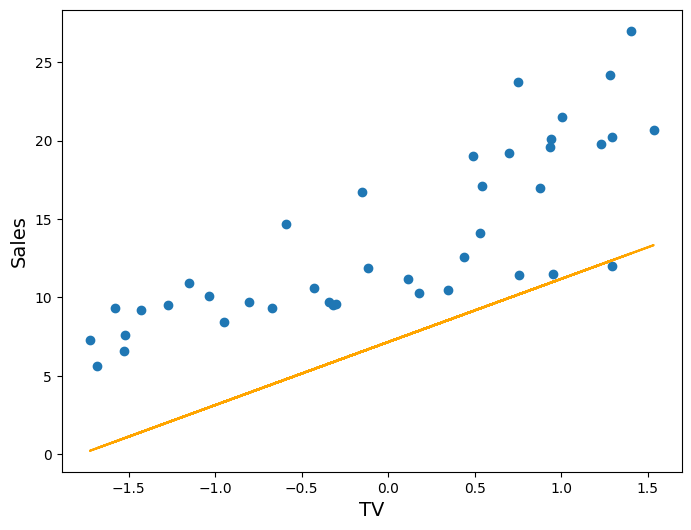

In [79]:
plt.scatter(df_test['TV_Transformed'], df_test['Sales'])
fig = plt.plot(df_test['TV_Transformed'], df_test['Pred'], c='orange', label='Regression Line')
plt.xlabel('TV', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()